# Jr Data Scientist Evaluation - 1, NextGrowthLabs




Name: Mahesh Chandra Duddu

EmailId: duddumaheshchandra@gmail.com

For any queries/anything required please send me a mail to this mail id.



Steps to run this project:

1. Open Google colab, import the .ipynb file or you can open this link(https://colab.research.google.com/drive/1k-esX4kR6UArE6JAQkSkqxvfIR6-Ad5i?usp=sharing) to access the .ipynb file.
2. Upload the templates.zip, model.pkl, train data, test data files.
3. Click on run all.
4. At the end of the run you will get a deployed link something like this(http://4d13-35-201-132-28.ngrok.io/).
5. Clicking on that link, you will redirect to the deployed link of the project.
6. There you can give values for the data to predict whether a customer will checkin hotel room or not.

If you are to run locally, please install the required libraries beforehand.
As there is no target feature, target feature is created using BookingsCheckedIn feature.
The whole project can be found here (https://drive.google.com/drive/folders/1Vh4VG_imtlYzXswDtjaDMCKo866l1QkS?usp=sharing)

# 1. Write a regex to extract all the numbers with orange color background from the below text in italics.

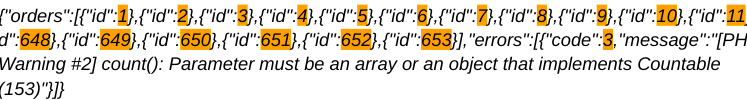


In [ ]:
import re

text = '{"orders":[{"id":1},{"id":2},{"id":3},{"id":4},{"id":5},{"id":6},{"id":7},{"id":8},{"id":9},{"id":10},{"id":11},{"id":648},{"id":649},{"id":650},{"id":651},{"id":652},{"id":653}],"errors":[{"code":3,"message":"[PHP Warning #2] count(): Parameter must be an array or an object that implements Countable (153)"}]}'

x = re.findall('(?<=":)[0-9]+(?=}|,)', text)

In [ ]:
x

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '648',
 '649',
 '650',
 '651',
 '652',
 '653',
 '3']

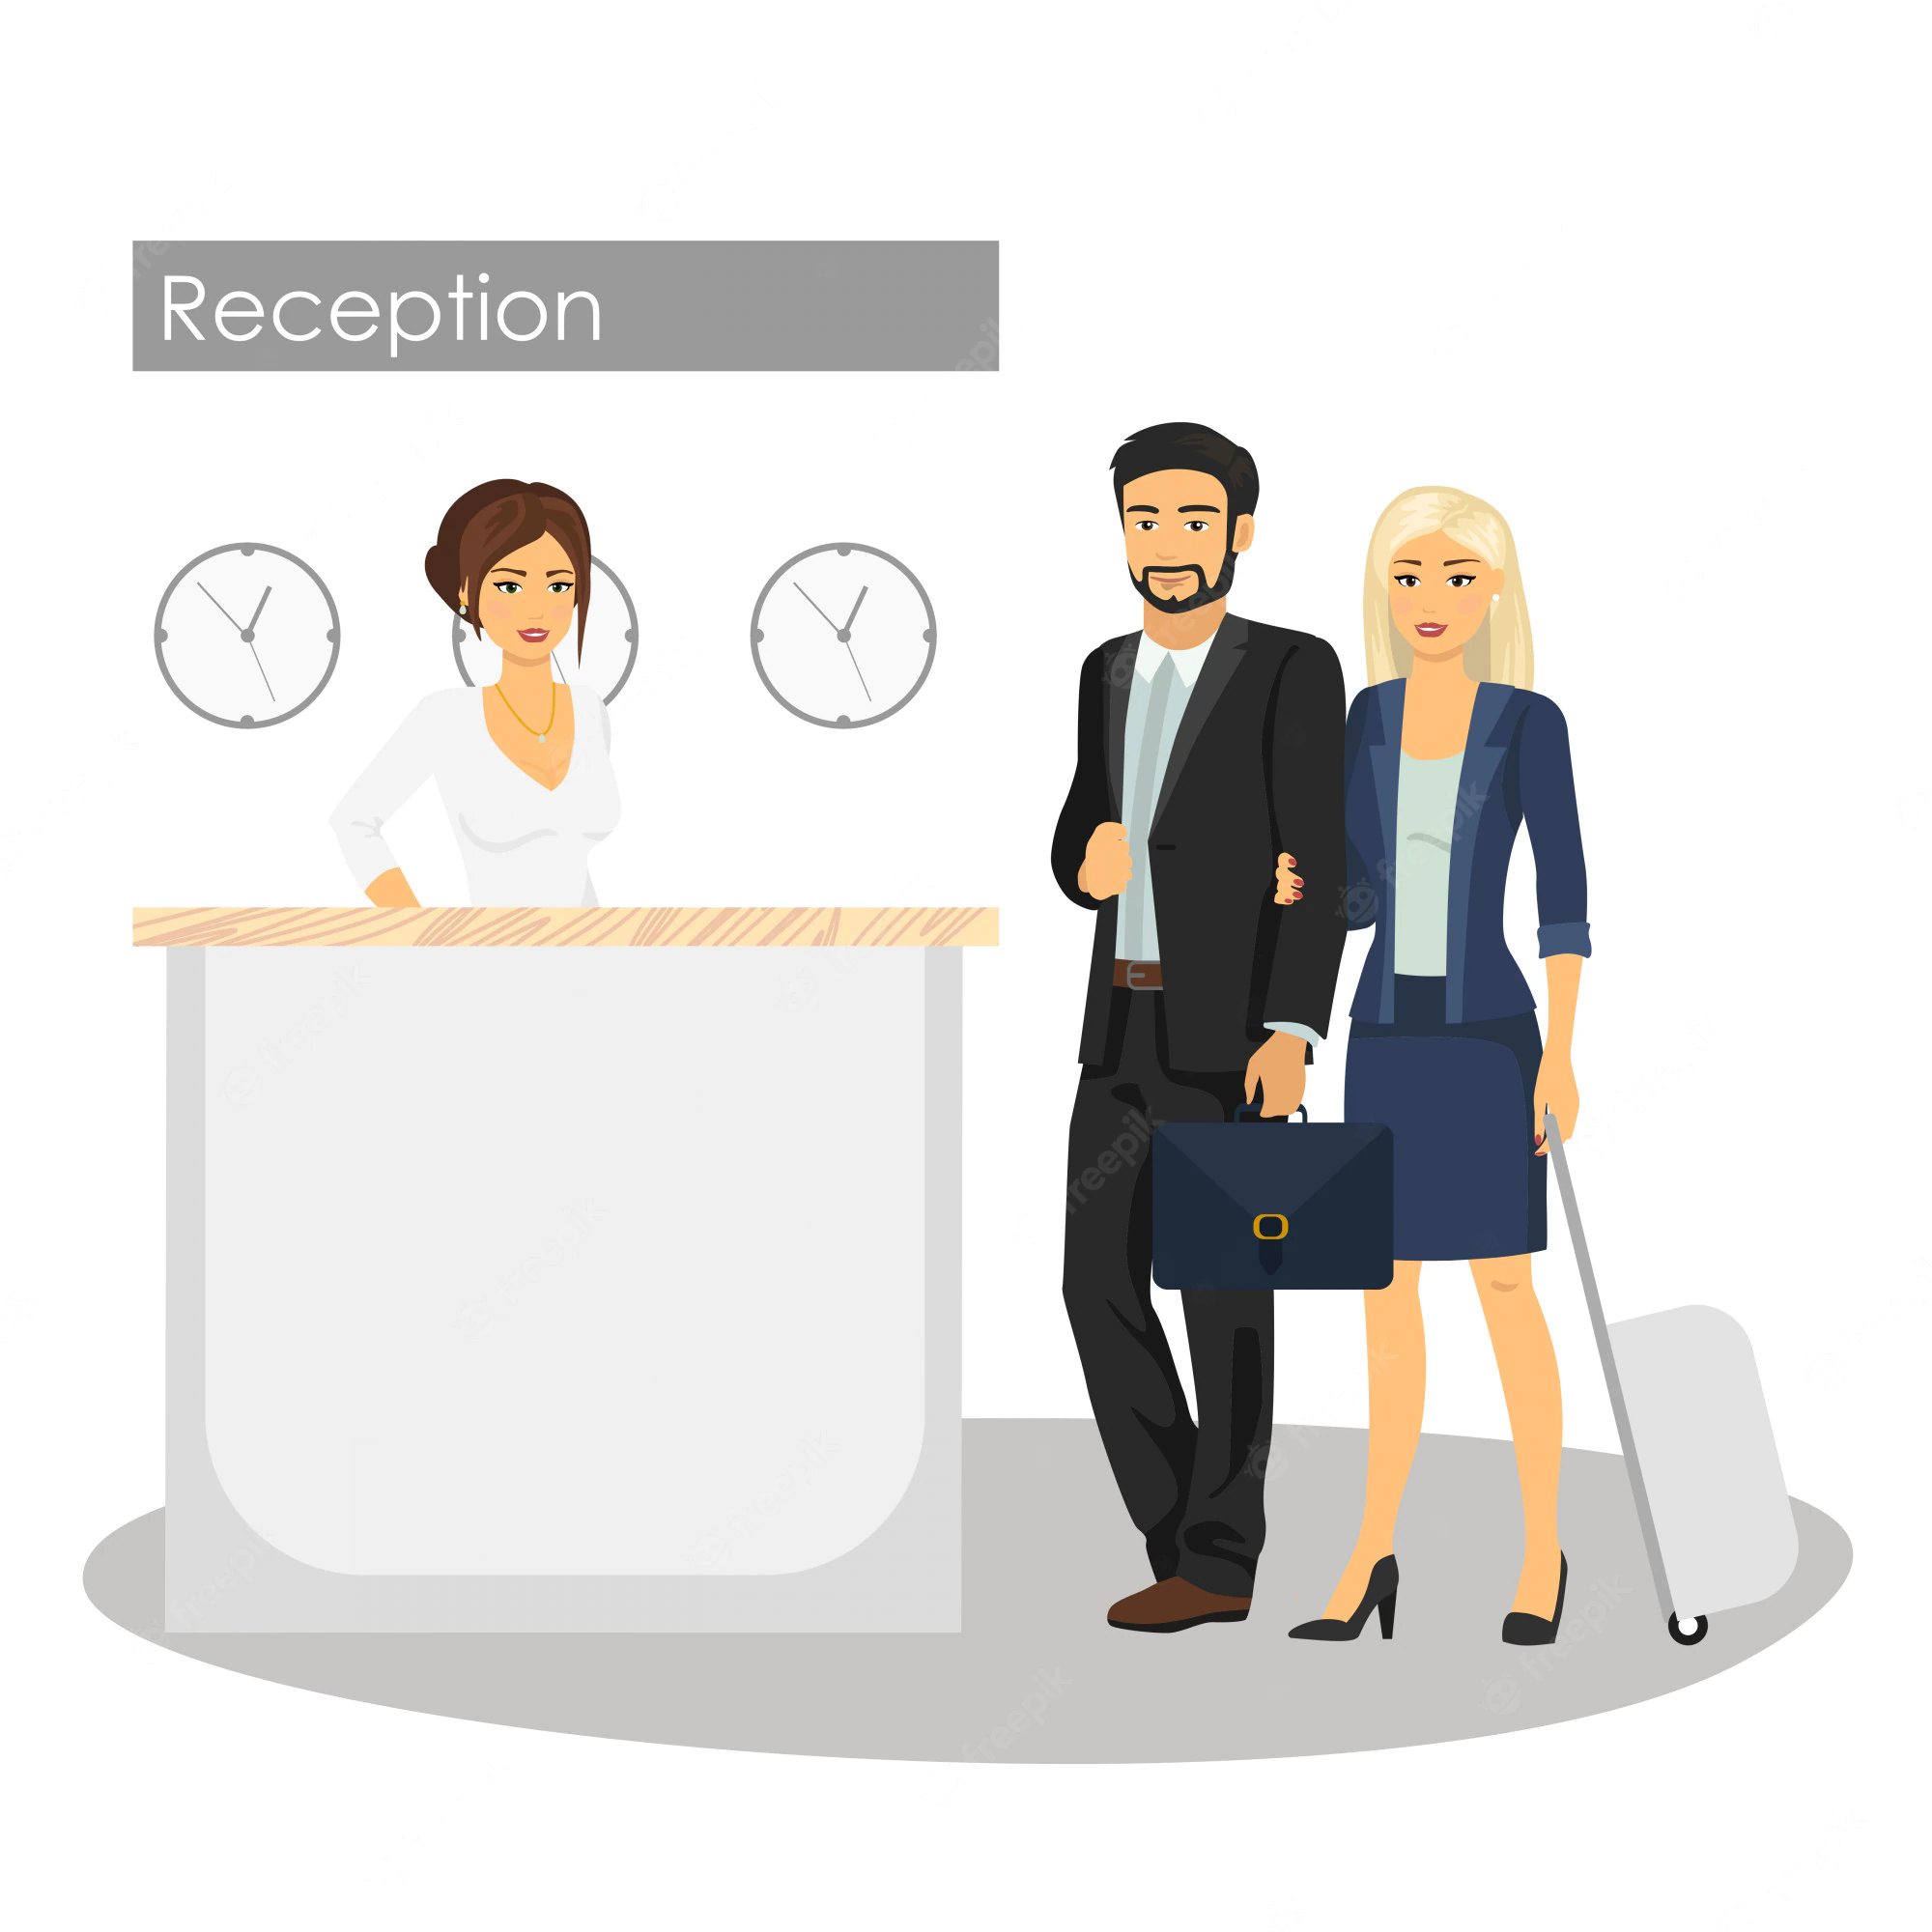

# 2. Customer CheckIn Prediction

Train a machine learning model (preferably with a neural network) that 
predicts the customer who is going to be checked in and test 
the prediction with below test data.


In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Read the dataset
test_data = pd.read_csv('/content/test_data_evaluation_part2.csv')
train_data = pd.read_csv('/content/train_data_evaluation_part_2.csv')

In [ ]:
#Printing head of training dataset
train_data.head()

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,0,1,PRT,51.0,150,45,371.0,105.3,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,PRT,NaN,1095,61,280.0,53.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,DEU,31.0,1095,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,FRA,60.0,1095,93,240.0,60.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5,FRA,51.0,1095,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Prints the type of data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82580 entries, 0 to 82579
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            82580 non-null  int64  
 1   ID                    82580 non-null  int64  
 2   Nationality           82580 non-null  object 
 3   Age                   78834 non-null  float64
 4   DaysSinceCreation     82580 non-null  int64  
 5   AverageLeadTime       82580 non-null  int64  
 6   LodgingRevenue        82580 non-null  float64
 7   OtherRevenue          82580 non-null  float64
 8   BookingsCanceled      82580 non-null  int64  
 9   BookingsNoShowed      82580 non-null  int64  
 10  BookingsCheckedIn     82580 non-null  int64  
 11  PersonsNights         82580 non-null  int64  
 12  RoomNights            82580 non-null  int64  
 13  DaysSinceLastStay     82580 non-null  int64  
 14  DaysSinceFirstStay    82580 non-null  int64  
 15  DistributionChannel

In [ ]:
#Describes the train data
train_data.describe()

,Unnamed: 0,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,82580.000000,82580.000000,78834.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,...,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000
mean,41289.500000,41290.500000,45.468554,459.138157,66.557205,300.457373,67.890023,0.002047,0.000642,0.798402,...,0.000884,0.002809,0.001732,0.012812,0.351671,0.142771,0.000303,0.003548,0.000121,0.088060
std,23838.936952,23838.936952,16.526276,311.309295,87.928995,373.337007,114.496223,0.067177,0.029725,0.696880,...,0.029719,0.052930,0.041577,0.112463,0.477495,0.349841,0.017397,0.059460,0.011004,0.283384
min,0.000000,1.000000,-11.000000,12.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20644.750000,20645.750000,34.000000,183.000000,0.000000,66.400000,2.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41289.500000,41290.500000,46.000000,406.000000,30.000000,234.000000,39.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61934.250000,61935.250000,57.000000,728.000000,104.000000,403.800000,88.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,82579.000000,82580.000000,122.000000,1095.000000,588.000000,21781.000000,7730.250000,9.000000,3.000000,66.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# prints the shape of train data
train_data.shape

(82580, 30)

In [ ]:
# prints the null values in train data
train_data.isnull().sum()

Unnamed: 0                 0
ID                         0
Nationality                0
Age                     3746
DaysSinceCreation          0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

In [ ]:
#Print value counts of columns
for i in list(train_data.columns):
  print(train_data[i].value_counts())

0        1
55080    1
55058    1
55057    1
55056    1
        ..
27525    1
27524    1
27523    1
27522    1
82579    1
Name: Unnamed: 0, Length: 82580, dtype: int64
1        1
55081    1
55059    1
55058    1
55057    1
        ..
27526    1
27525    1
27524    1
27523    1
82580    1
Name: ID, Length: 82580, dtype: int64
FRA    12307
PRT    11382
DEU    10164
GBR     8610
ESP     4864
       ...  
GNQ        1
GIN        1
SWZ        1
SOM        1
NPL        1
Name: Nationality, Length: 188, dtype: int64
50.0     2015
51.0     2013
54.0     1965
53.0     1913
49.0     1871
         ... 
110.0       1
91.0        1
122.0       1
96.0        1
109.0       1
Name: Age, Length: 105, dtype: int64
212     298
232     247
22      233
281     227
101     225
       ... 
1077      5
1080      4
1073      4
473       3
919       1
Name: DaysSinceCreation, Length: 1083, dtype: int64
0      22157
1       1693
2       1051
6       1040
5       1014
       ...  
459        1
381        1
425    

Unnamed:0, Id, BookinsCanceled, BookingsNoShowed, SRHighFloor, SRLowFloor,SRAccessibleRoom, SRMediumFloor, SRBathtub, SRShower, SRNearElevator, SRAwayFromElevator, SRNoAlcoholInMiniBar 

In [ ]:
# train_data.drop(['Unnamed: 0', 'ID', 'BookingsCanceled', 'BookingsNoShowed', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRHighFloor', 'SRCrib'], axis = 1, inplace = True)
# test_data.drop(['Unnamed: 0', 'ID', 'BookingsCanceled', 'BookingsNoShowed', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRHighFloor', 'SRCrib'], axis = 1, inplace = True)

# Modify the values to binary
train_data['target'] = (train_data['BookingsCheckedIn'] > 0).astype(int)
test_data['target'] = (test_data['BookingsCheckedIn'] > 0).astype(int)

# Selecting features to prevent data leakage
train_data = train_data[['Nationality', 'Age', 'DistributionChannel','DaysSinceCreation','AverageLeadTime',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'target']]
test_data = test_data[['Nationality', 'Age', 'DistributionChannel','DaysSinceCreation','AverageLeadTime',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'target']]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


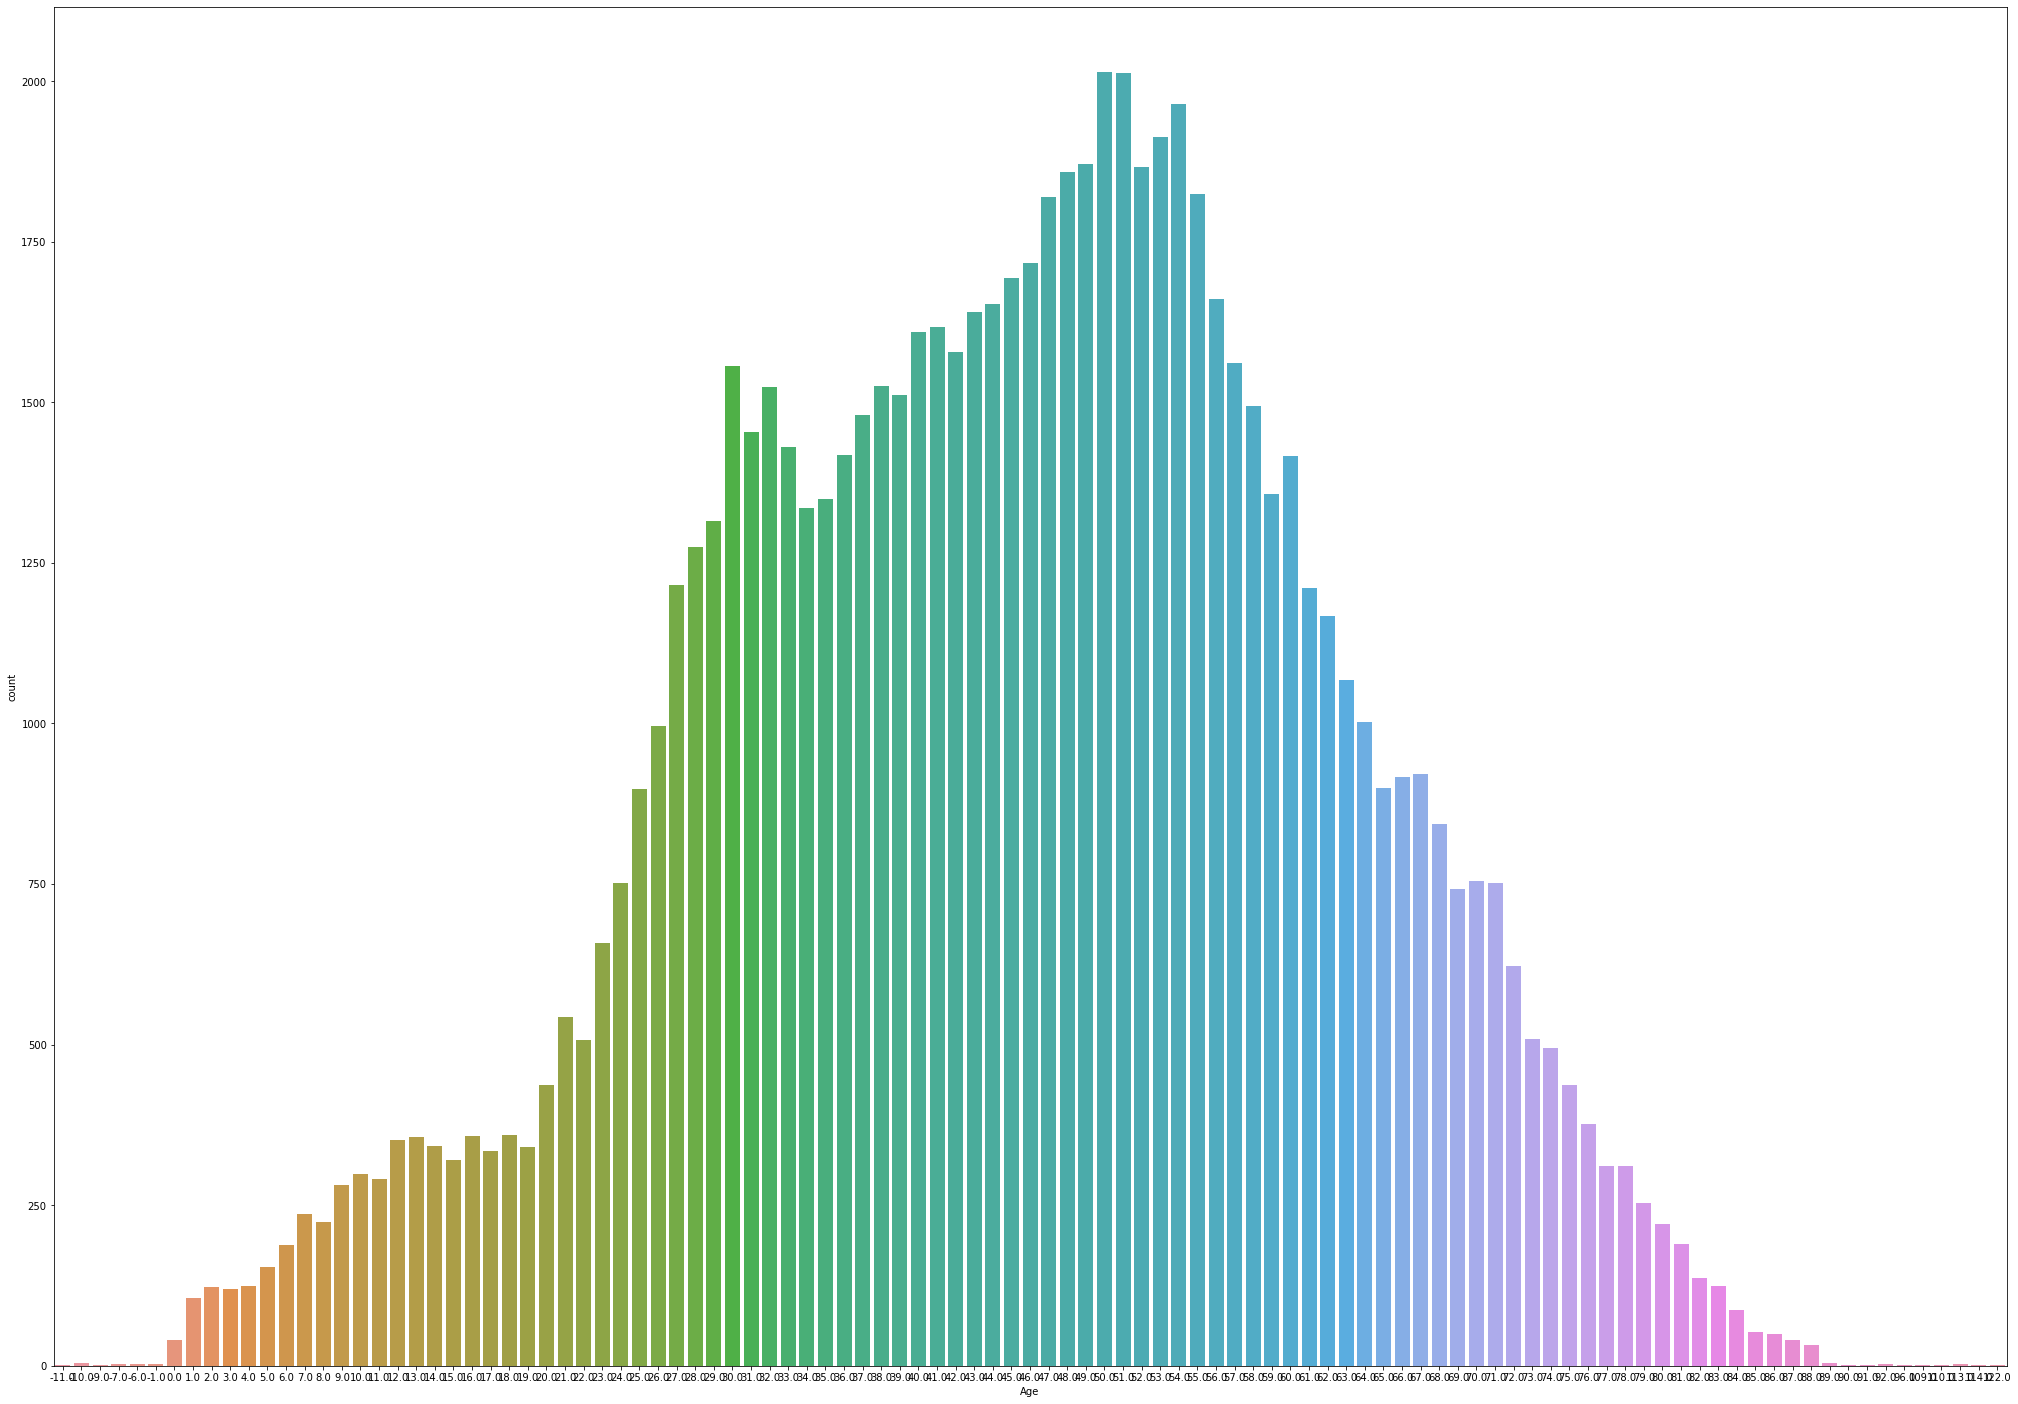

In [ ]:
# Age count plot
plt.figure(figsize=(35,25))
sns.countplot(train_data['Age'])

In [ ]:
train_data[train_data['Age']<18.0]

,Nationality,Age,DistributionChannel,DaysSinceCreation,AverageLeadTime,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,target
34,PRT,3.0,Direct,1095,0,Direct,0,0,0,0,0,0,1,0,0,0,0,0,0,0
45,ITA,17.0,Travel Agent/Operator,1095,0,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,0
67,FRA,13.0,Travel Agent/Operator,1095,0,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,0
81,ESP,3.0,Direct,1094,103,Direct,0,0,0,0,0,0,1,1,0,0,0,0,0,1
87,ESP,6.0,Direct,1094,0,Direct,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82536,PRT,7.0,Direct,13,0,Direct,0,0,0,0,0,0,0,0,1,0,0,0,0,0
82542,PRT,2.0,Travel Agent/Operator,13,0,Other,1,0,0,0,0,0,1,0,0,0,0,0,0,0
82568,NLD,2.0,Travel Agent/Operator,12,0,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,0
82569,NLD,0.0,Travel Agent/Operator,12,0,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
((len(train_data[train_data['Age']<18.0])+ train_data['Age'].isnull().sum())/train_data.shape[0])*100

9.69847420682974

In [ ]:
len(train_data[train_data['Age']<18.0])+ train_data['Age'].isnull().sum()

8009

In [ ]:
(train_data.isnull().sum()/train_data.shape[0])*100

Nationality             0.000000
Age                     4.536207
DistributionChannel     0.000000
DaysSinceCreation       0.000000
AverageLeadTime         0.000000
MarketSegment           0.000000
SRHighFloor             0.000000
SRLowFloor              0.000000
SRAccessibleRoom        0.000000
SRMediumFloor           0.000000
SRBathtub               0.000000
SRShower                0.000000
SRCrib                  0.000000
SRKingSizeBed           0.000000
SRTwinBed               0.000000
SRNearElevator          0.000000
SRAwayFromElevator      0.000000
SRNoAlcoholInMiniBar    0.000000
SRQuietRoom             0.000000
target                  0.000000
dtype: float64

In [ ]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import missingno as missno

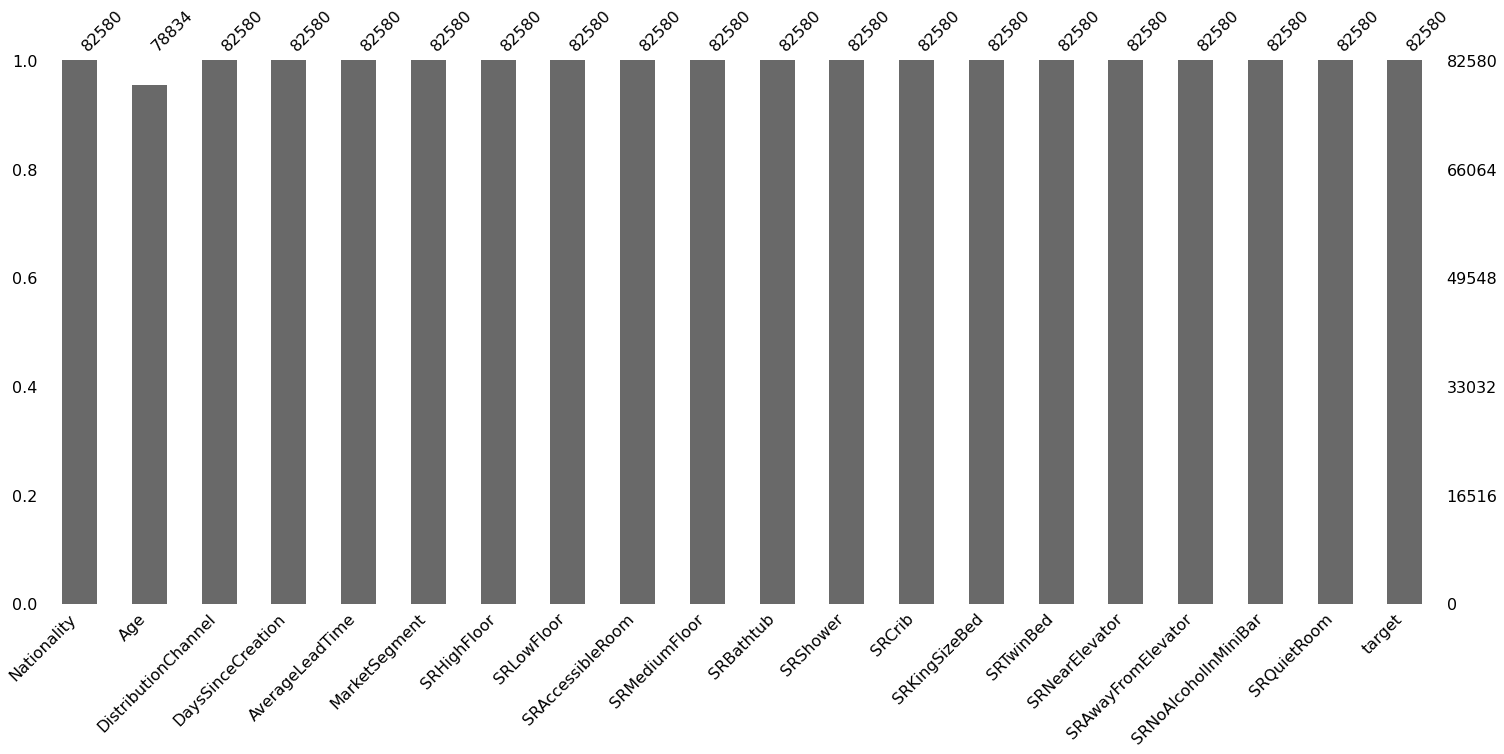

In [ ]:
missno.bar(train_data)

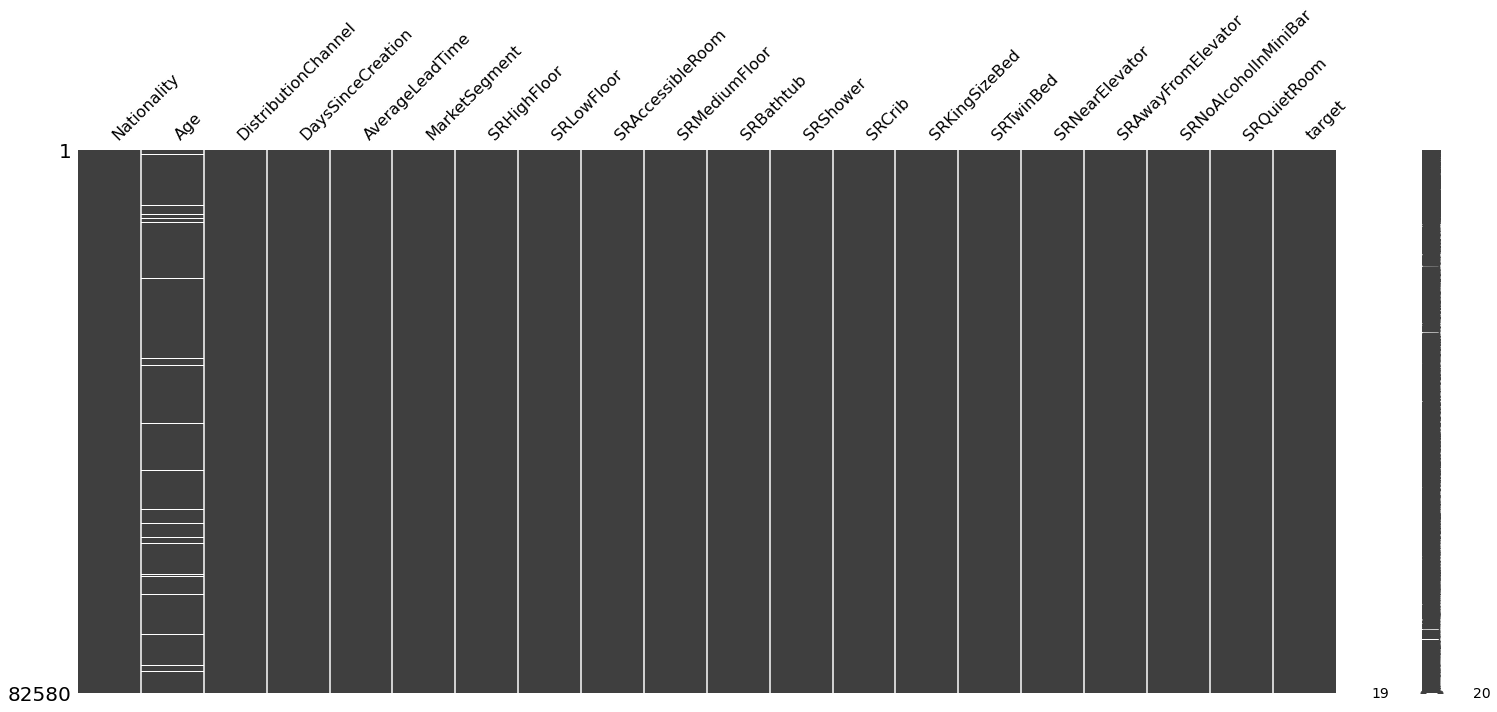

In [ ]:
missno.matrix(train_data)

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


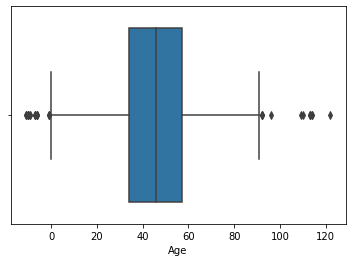

In [ ]:
sns.boxplot(train_data['Age'])

In [ ]:
train_data['Age'] = np.where(train_data['Age'] < 18.0, 18.0, train_data['Age'])
test_data['Age'] = np.where(test_data['Age'] < 18.0, 18.0, test_data['Age'])

In [ ]:
train_data['Age']

0        51.0
1         NaN
2        31.0
3        60.0
4        51.0
         ... 
82575    51.0
82576    50.0
82577    50.0
82578     NaN
82579    18.0
Name: Age, Length: 82580, dtype: float64

In [ ]:
train_data['Age'].isnull().sum()

3746

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 3)
d1 = train_data[['Age']]
d2 = test_data[['Age']]
d1 = pd.DataFrame(imputer.fit_transform(d1),columns = d1.columns)
d2 = pd.DataFrame(imputer.fit_transform(d2),columns = d2.columns)
d1

,Age
0,51.00000
1,45.87116
2,31.00000
3,60.00000
4,51.00000
...,...
82575,51.00000
82576,50.00000
82577,50.00000
82578,45.87116


In [ ]:
train_data['Age'] = d1['Age']
test_data['Age'] = d2['Age']

In [ ]:
train_data.isnull().sum()

Nationality             0
Age                     0
DistributionChannel     0
DaysSinceCreation       0
AverageLeadTime         0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
target                  0
dtype: int64

In [ ]:
#Converting age column to int
train_data['Age'] = train_data['Age'].astype(int)
test_data['Age'] = test_data['Age'].astype(int)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


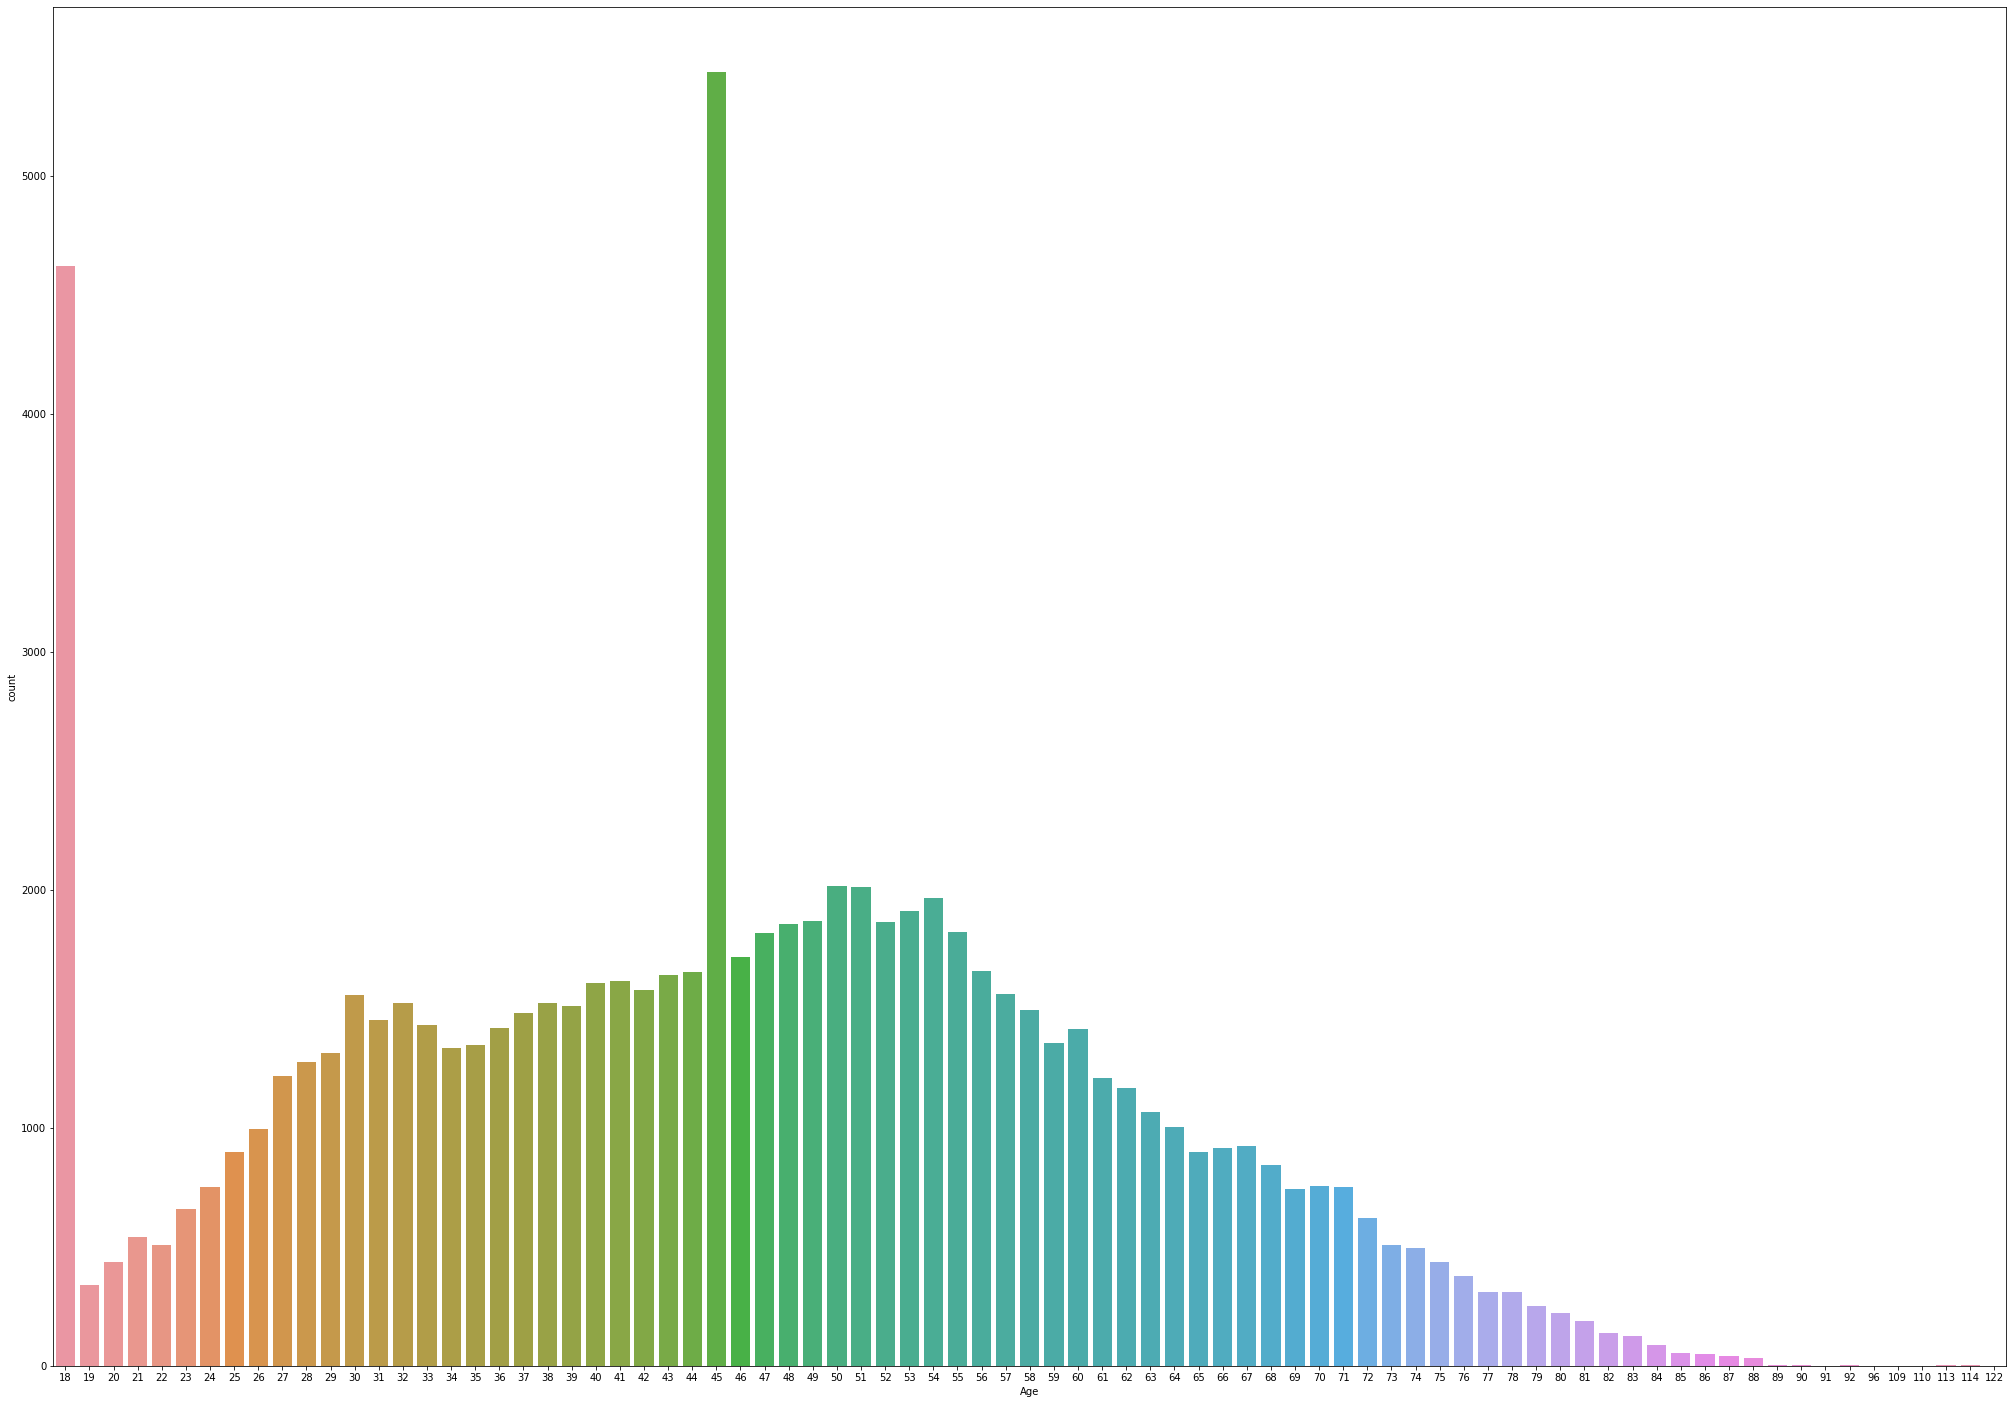

In [ ]:
plt.figure(figsize=(35,25))
sns.countplot(train_data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


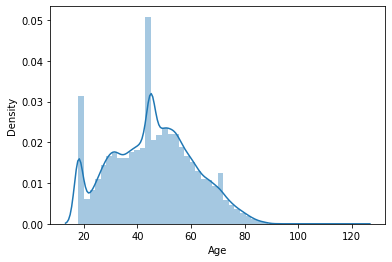

In [ ]:
sns.distplot(train_data['Age'])

In [ ]:
train_data.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Age                       235.511405
DaysSinceCreation       96913.477213
AverageLeadTime          7731.508165
SRHighFloor                 0.045260
SRLowFloor                  0.001427
SRAccessibleRoom            0.000254
SRMediumFloor               0.000883
SRBathtub                   0.002802
SRShower                    0.001729
SRCrib                      0.012648
SRKingSizeBed               0.228001
SRTwinBed                   0.122389
SRNearElevator              0.000303
SRAwayFromElevator          0.003536
SRNoAlcoholInMiniBar        0.000121
SRQuietRoom                 0.080306
target                      0.179698
dtype: float64

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82580 entries, 0 to 82579
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Nationality           82580 non-null  object
 1   Age                   82580 non-null  int64 
 2   DistributionChannel   82580 non-null  object
 3   DaysSinceCreation     82580 non-null  int64 
 4   AverageLeadTime       82580 non-null  int64 
 5   MarketSegment         82580 non-null  object
 6   SRHighFloor           82580 non-null  int64 
 7   SRLowFloor            82580 non-null  int64 
 8   SRAccessibleRoom      82580 non-null  int64 
 9   SRMediumFloor         82580 non-null  int64 
 10  SRBathtub             82580 non-null  int64 
 11  SRShower              82580 non-null  int64 
 12  SRCrib                82580 non-null  int64 
 13  SRKingSizeBed         82580 non-null  int64 
 14  SRTwinBed             82580 non-null  int64 
 15  SRNearElevator        82580 non-null

In [ ]:
train_data.describe()

,Age,DaysSinceCreation,AverageLeadTime,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,target
count,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000
mean,45.831642,459.138157,66.557205,0.047518,0.001429,0.000254,0.000884,0.002809,0.001732,0.012812,0.351671,0.142771,0.000303,0.003548,0.000121,0.088060,0.765149
std,15.346381,311.309295,87.928995,0.212744,0.037774,0.015945,0.029719,0.052930,0.041577,0.112463,0.477495,0.349841,0.017397,0.059460,0.011004,0.283384,0.423908
min,18.000000,12.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,183.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,45.000000,406.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,56.000000,728.000000,104.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,122.000000,1095.000000,588.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train_data

,Nationality,Age,DistributionChannel,DaysSinceCreation,AverageLeadTime,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,target
0,PRT,51,Corporate,150,45,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,PRT,45,Travel Agent/Operator,1095,61,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,DEU,31,Travel Agent/Operator,1095,0,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,FRA,60,Travel Agent/Operator,1095,93,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,FRA,51,Travel Agent/Operator,1095,0,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82575,SWE,51,Travel Agent/Operator,12,114,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,1
82576,SWE,50,Travel Agent/Operator,12,0,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,0
82577,DEU,50,Travel Agent/Operator,12,18,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,1
82578,PRT,45,Travel Agent/Operator,12,11,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
(train_data.nunique()/train_data.shape[0])*100

Nationality             0.227658
Age                     0.098087
DistributionChannel     0.004844
DaysSinceCreation       1.311456
AverageLeadTime         0.506176
MarketSegment           0.008477
SRHighFloor             0.002422
SRLowFloor              0.002422
SRAccessibleRoom        0.002422
SRMediumFloor           0.002422
SRBathtub               0.002422
SRShower                0.002422
SRCrib                  0.002422
SRKingSizeBed           0.002422
SRTwinBed               0.002422
SRNearElevator          0.002422
SRAwayFromElevator      0.002422
SRNoAlcoholInMiniBar    0.002422
SRQuietRoom             0.002422
target                  0.002422
dtype: float64

In [ ]:
train_data.columns

Index(['Nationality', 'Age', 'DistributionChannel', 'DaysSinceCreation',
       'AverageLeadTime', 'MarketSegment', 'SRHighFloor', 'SRLowFloor',
       'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib',
       'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'target'],
      dtype='object')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82580 entries, 0 to 82579
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Nationality           82580 non-null  object
 1   Age                   82580 non-null  int64 
 2   DistributionChannel   82580 non-null  object
 3   DaysSinceCreation     82580 non-null  int64 
 4   AverageLeadTime       82580 non-null  int64 
 5   MarketSegment         82580 non-null  object
 6   SRHighFloor           82580 non-null  int64 
 7   SRLowFloor            82580 non-null  int64 
 8   SRAccessibleRoom      82580 non-null  int64 
 9   SRMediumFloor         82580 non-null  int64 
 10  SRBathtub             82580 non-null  int64 
 11  SRShower              82580 non-null  int64 
 12  SRCrib                82580 non-null  int64 
 13  SRKingSizeBed         82580 non-null  int64 
 14  SRTwinBed             82580 non-null  int64 
 15  SRNearElevator        82580 non-null

In [ ]:
train_data.describe()

,Age,DaysSinceCreation,AverageLeadTime,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,target
count,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000
mean,45.831642,459.138157,66.557205,0.047518,0.001429,0.000254,0.000884,0.002809,0.001732,0.012812,0.351671,0.142771,0.000303,0.003548,0.000121,0.088060,0.765149
std,15.346381,311.309295,87.928995,0.212744,0.037774,0.015945,0.029719,0.052930,0.041577,0.112463,0.477495,0.349841,0.017397,0.059460,0.011004,0.283384,0.423908
min,18.000000,12.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,183.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,45.000000,406.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,56.000000,728.000000,104.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,122.000000,1095.000000,588.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
len(train_data['Nationality'].unique())

188

In [ ]:
train_data['DistributionChannel'].unique()

array(['Corporate', 'Travel Agent/Operator', 'Direct',
       'Electronic Distribution'], dtype=object)

In [ ]:
train_data['MarketSegment'].unique()

array(['Corporate', 'Travel Agent/Operator', 'Other', 'Direct',
       'Complementary', 'Groups', 'Aviation'], dtype=object)

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 2.9 MB/s 


In [ ]:
import category_encoders as ce

encoder= ce.BinaryEncoder(cols=['DistributionChannel', 'MarketSegment'],return_df=True)

In [ ]:
train_data=encoder.fit_transform(train_data) 
test_data=encoder.fit_transform(test_data) 
train_data

,Nationality,Age,DistributionChannel_0,DistributionChannel_1,DistributionChannel_2,DaysSinceCreation,AverageLeadTime,MarketSegment_0,MarketSegment_1,MarketSegment_2,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,target
0,PRT,51,0,0,1,150,45,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,PRT,45,0,1,0,1095,61,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,DEU,31,0,1,0,1095,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,FRA,60,0,1,0,1095,93,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,FRA,51,0,1,0,1095,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82575,SWE,51,0,1,0,12,114,0,1,1,...,0,0,0,1,0,0,0,0,0,1
82576,SWE,50,0,1,0,12,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
82577,DEU,50,0,1,0,12,18,0,1,1,...,0,0,0,0,0,0,0,0,0,1
82578,PRT,45,0,1,0,12,11,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
train_data['Nationality'] =  (train_data['Nationality'] == 'IND').astype(int)
test_data['Nationality'] =  (test_data['Nationality'] == 'IND').astype(int)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82580 entries, 0 to 82579
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Nationality            82580 non-null  int64
 1   Age                    82580 non-null  int64
 2   DistributionChannel_0  82580 non-null  int64
 3   DistributionChannel_1  82580 non-null  int64
 4   DistributionChannel_2  82580 non-null  int64
 5   DaysSinceCreation      82580 non-null  int64
 6   AverageLeadTime        82580 non-null  int64
 7   MarketSegment_0        82580 non-null  int64
 8   MarketSegment_1        82580 non-null  int64
 9   MarketSegment_2        82580 non-null  int64
 10  SRHighFloor            82580 non-null  int64
 11  SRLowFloor             82580 non-null  int64
 12  SRAccessibleRoom       82580 non-null  int64
 13  SRMediumFloor          82580 non-null  int64
 14  SRBathtub              82580 non-null  int64
 15  SRShower               82580 non-nul

In [ ]:
#Drop Duplicates
train_data.drop_duplicates(keep = 'first', inplace = True, ignore_index = True)
test_data.drop_duplicates(keep = 'first', inplace = True, ignore_index = True)

# Data Visualization


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


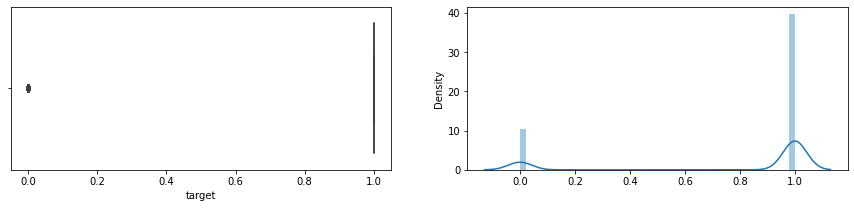

In [ ]:
# Check distribution of Target Variable
# setup figure size
plt.subplots(figsize=(15,3))

# boxplot
plt.subplot(1, 2, 1)
sns.boxplot(train_data['target']);

# distplot
plt.subplot(1, 2, 2)
sns.distplot(x=train_data['target']);

In [ ]:
len(train_data.columns)

24

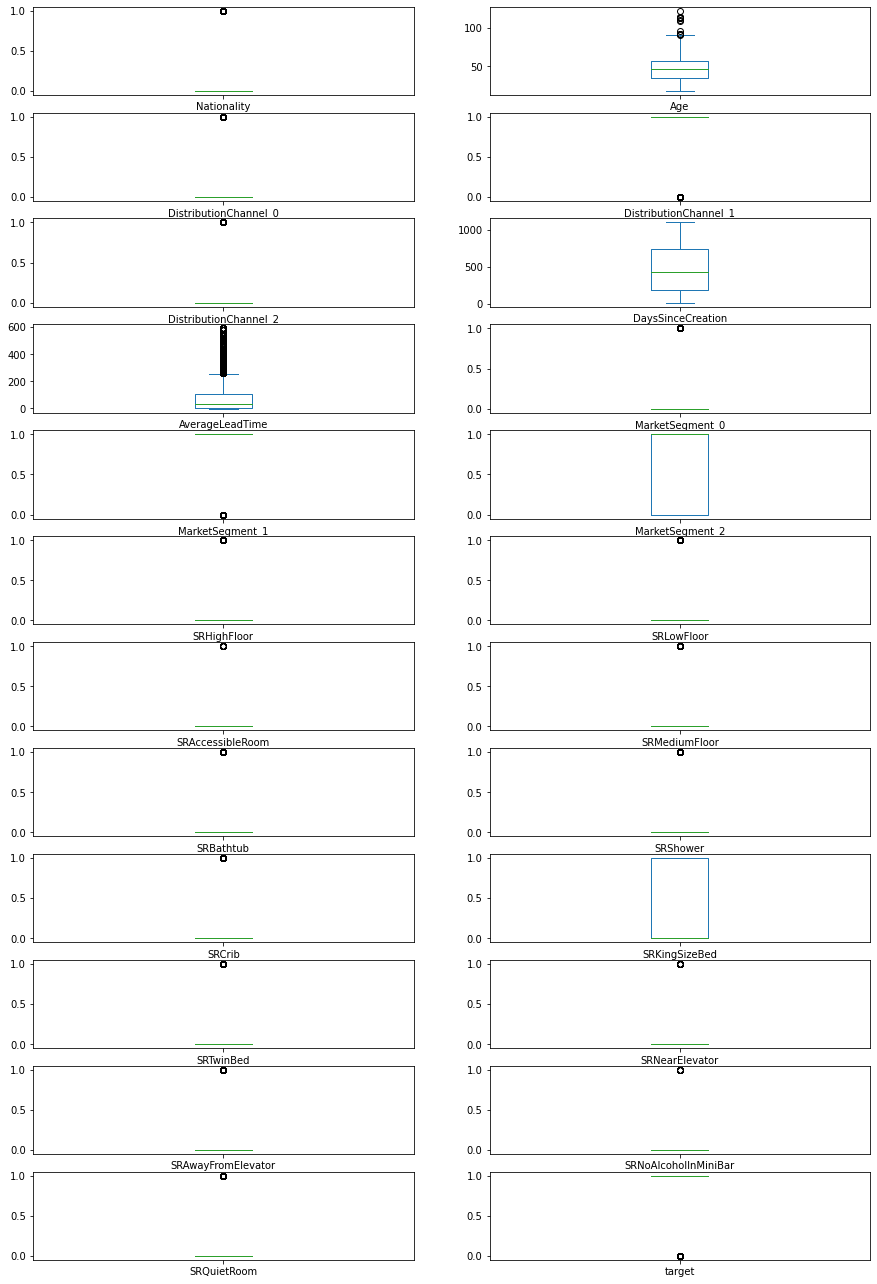

In [ ]:
train_data.plot(kind="box",subplots=True,layout=(13,2),figsize=(15,25));

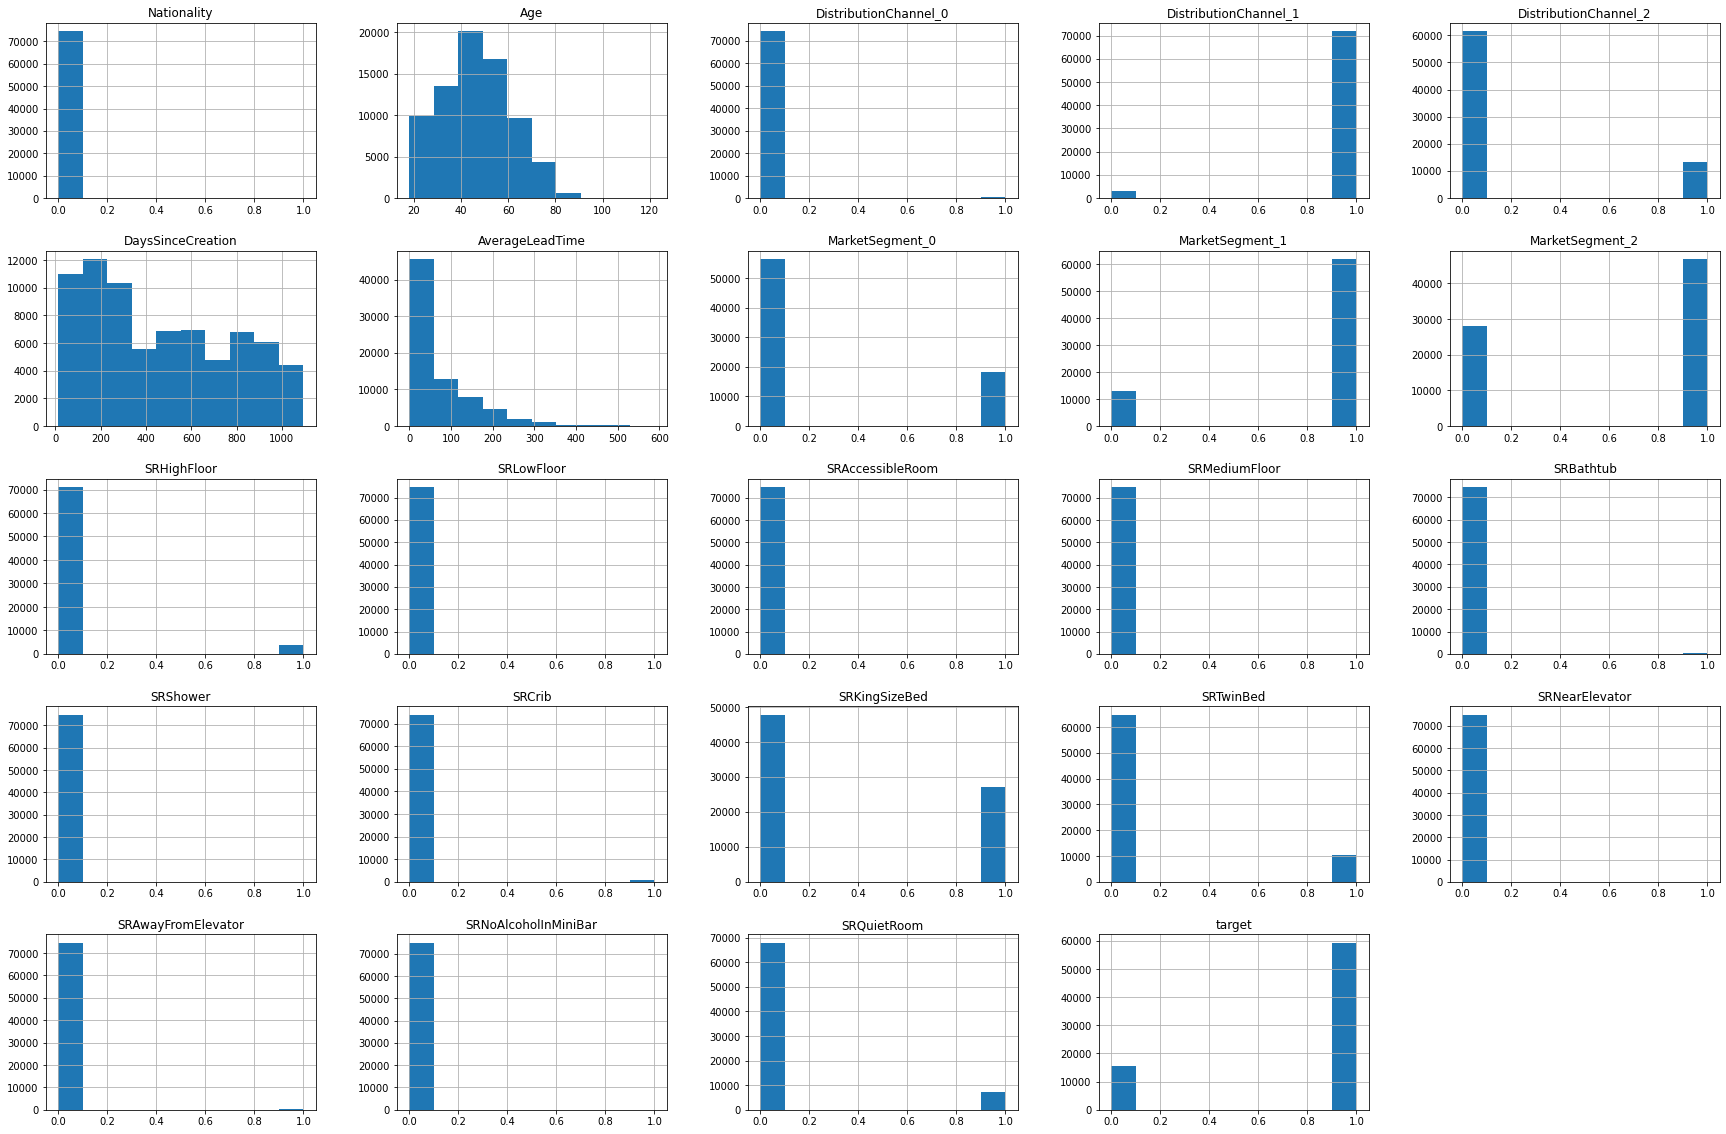

In [ ]:
train_data.hist(figsize=(30,20));

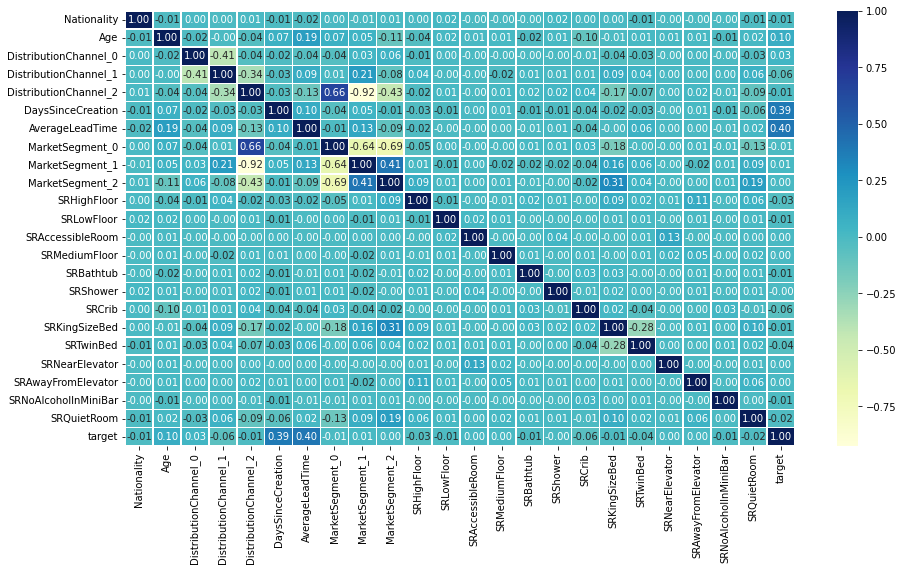

In [ ]:
fig , ax = plt.subplots(figsize=(15,8))
sns.heatmap(train_data.corr(),annot = True,fmt='.2f',cmap='YlGnBu',linewidth=0.5)

In [ ]:
train_data.var()

Nationality                  0.002504
Age                        221.358899
DistributionChannel_0        0.006645
DistributionChannel_1        0.036828
DistributionChannel_2        0.146005
DaysSinceCreation        96840.506244
AverageLeadTime           7026.479996
MarketSegment_0              0.185146
MarketSegment_1              0.143214
MarketSegment_2              0.234121
SRHighFloor                  0.047792
SRLowFloor                   0.001533
SRAccessibleRoom             0.000280
SRMediumFloor                0.000960
SRBathtub                    0.003035
SRShower                     0.001892
SRCrib                       0.012914
SRKingSizeBed                0.231106
SRTwinBed                    0.117800
SRNearElevator               0.000334
SRAwayFromElevator           0.003844
SRNoAlcoholInMiniBar         0.000134
SRQuietRoom                  0.085131
target                       0.165033
dtype: float64

# Feature Engineering

Tried with some new features but it isn't improving the model's performace.

# Feature Selection

Tried feature selection using embedded method SelectFromModel from sklearn using LinearSVC and LogisticRegressor models but it didn't help in improving the model's performance.

# Model Building


In [ ]:
X = train_data.drop('target', axis = 1)
y = train_data['target']


In [ ]:
X

,Nationality,Age,DistributionChannel_0,DistributionChannel_1,DistributionChannel_2,DaysSinceCreation,AverageLeadTime,MarketSegment_0,MarketSegment_1,MarketSegment_2,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,0,51,0,0,1,150,45,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,45,0,1,0,1095,61,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,31,0,1,0,1095,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,60,0,1,0,1095,93,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,51,0,1,0,1095,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74890,0,51,0,1,0,12,114,0,1,1,...,0,0,0,0,1,0,0,0,0,0
74891,0,50,0,1,0,12,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
74892,0,50,0,1,0,12,18,0,1,1,...,0,0,0,0,0,0,0,0,0,0
74893,0,45,0,1,0,12,11,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for i in list(X.columns):
  print(X[i].value_counts())

0    74707
1      188
Name: Nationality, dtype: int64
45     4232
18     2674
50     1922
51     1918
54     1875
       ... 
91        1
110       1
122       1
96        1
109       1
Name: Age, Length: 81, dtype: int64
0    74394
1      501
Name: DistributionChannel_0, dtype: int64
1    72027
0     2868
Name: DistributionChannel_1, dtype: int64
0    61600
1    13295
Name: DistributionChannel_2, dtype: int64
232     216
101     213
22      204
281     199
78      190
       ... 
1087      5
1073      4
1080      4
473       3
919       1
Name: DaysSinceCreation, Length: 1083, dtype: int64
0      18294
1       1658
2       1031
4        968
6        948
       ...  
361        1
478        1
425        1
424        1
408        1
Name: AverageLeadTime, Length: 418, dtype: int64
0    56521
1    18374
Name: MarketSegment_0, dtype: int64
1    61922
0    12973
Name: MarketSegment_1, dtype: int64
1    46886
0    28009
Name: MarketSegment_2, dtype: int64
0    71126
1     3769
Name: SRHighFl

In [ ]:
y

0        1
1        1
2        0
3        1
4        0
        ..
74890    1
74891    0
74892    1
74893    1
74894    0
Name: target, Length: 74895, dtype: int64

In [ ]:
y.value_counts()

1    59279
0    15616
Name: target, dtype: int64

In [ ]:
x = X
x_test = test_data.drop('target', axis = 1)
y_test = test_data['target']

import random, os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pickle

In [ ]:
model = Sequential()
model.add(Dense(12, input_shape=(x.shape[1],), activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# tf_seed(seed=0)
class_weight = {0: 3.,
                1: 1.}
model.fit(x, y, epochs=50, batch_size=1000, class_weight = class_weight)
# evaluate the keras model
_, accuracy = model.evaluate(x, y)
print('Training Accuracy: %.2f' % (accuracy*100))
_, accuracy = model.evaluate(x_test, y_test)
print('Test Accuracy: %.2f' % (accuracy*100))

Epoch 1/50
75/75 [==============================] - 2s 5ms/step - loss: 4.1007 - accuracy: 0.5824
Epoch 2/50
75/75 [==============================] - 1s 7ms/step - loss: 0.4803 - accuracy: 0.8782
Epoch 3/50
75/75 [==============================] - 0s 5ms/step - loss: 0.3677 - accuracy: 0.9073
Epoch 4/50
75/75 [==============================] - 0s 5ms/step - loss: 0.3392 - accuracy: 0.9120
Epoch 5/50
75/75 [==============================] - 1s 7ms/step - loss: 0.3159 - accuracy: 0.9175
Epoch 6/50
75/75 [==============================] - 0s 5ms/step - loss: 0.2788 - accuracy: 0.9259
Epoch 7/50
75/75 [==============================] - 0s 6ms/step - loss: 0.2205 - accuracy: 0.9362
Epoch 8/50
75/75 [==============================] - 0s 5ms/step - loss: 0.1910 - accuracy: 0.9444
Epoch 9/50
75/75 [==============================] - 0s 6ms/step - loss: 0.1732 - accuracy: 0.9491
Epoch 10/50
75/75 [==============================] - 0s 6ms/step - loss: 0.1645 - accuracy: 0.9518
Epoch 11/50
75/75 [

In [ ]:
preds = (model.predict(x_test) > 0.5).astype(int)

In [ ]:
preds

array([[0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
    

In [ ]:
preds = pd.DataFrame(preds, columns = ['customerCheckIn'])
output = pd.concat([x_test, preds], axis = 1)

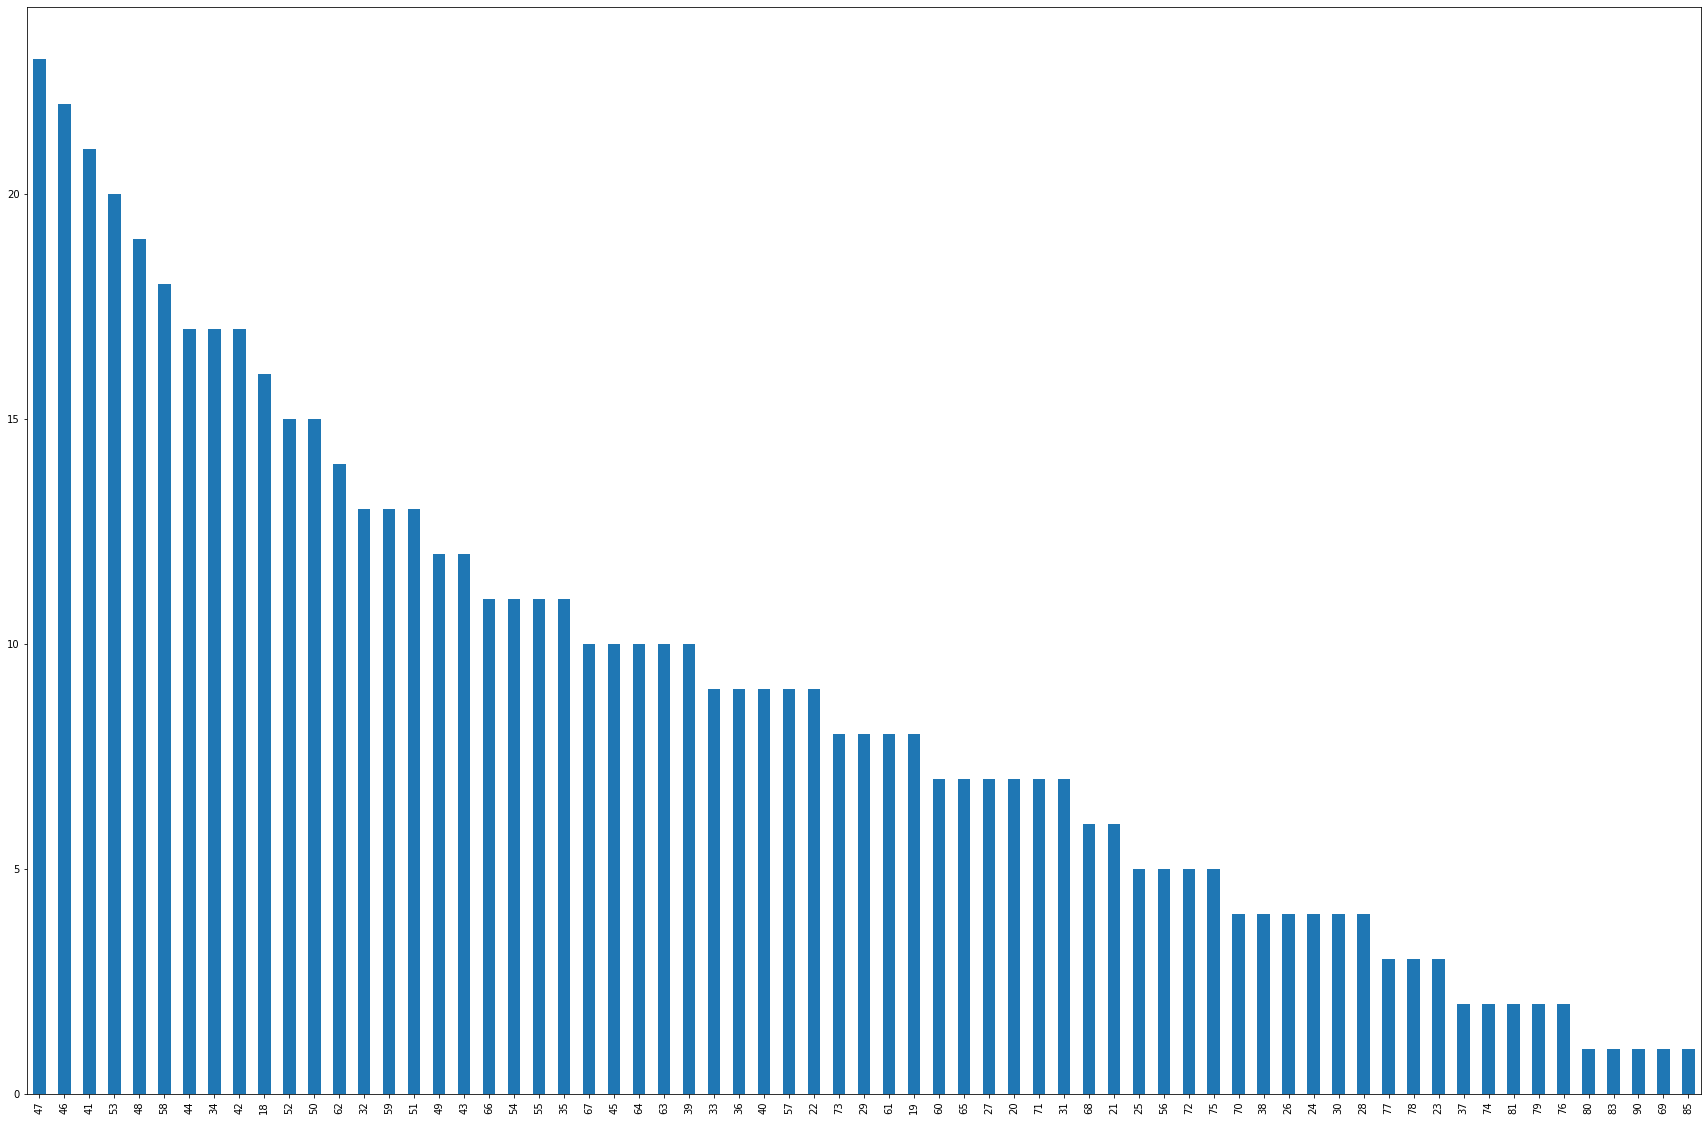

In [ ]:
plt.figure(figsize=(30,20))
output[output['customerCheckIn'] == 1]['Age'].value_counts().plot(kind = 'bar')
plt.show()

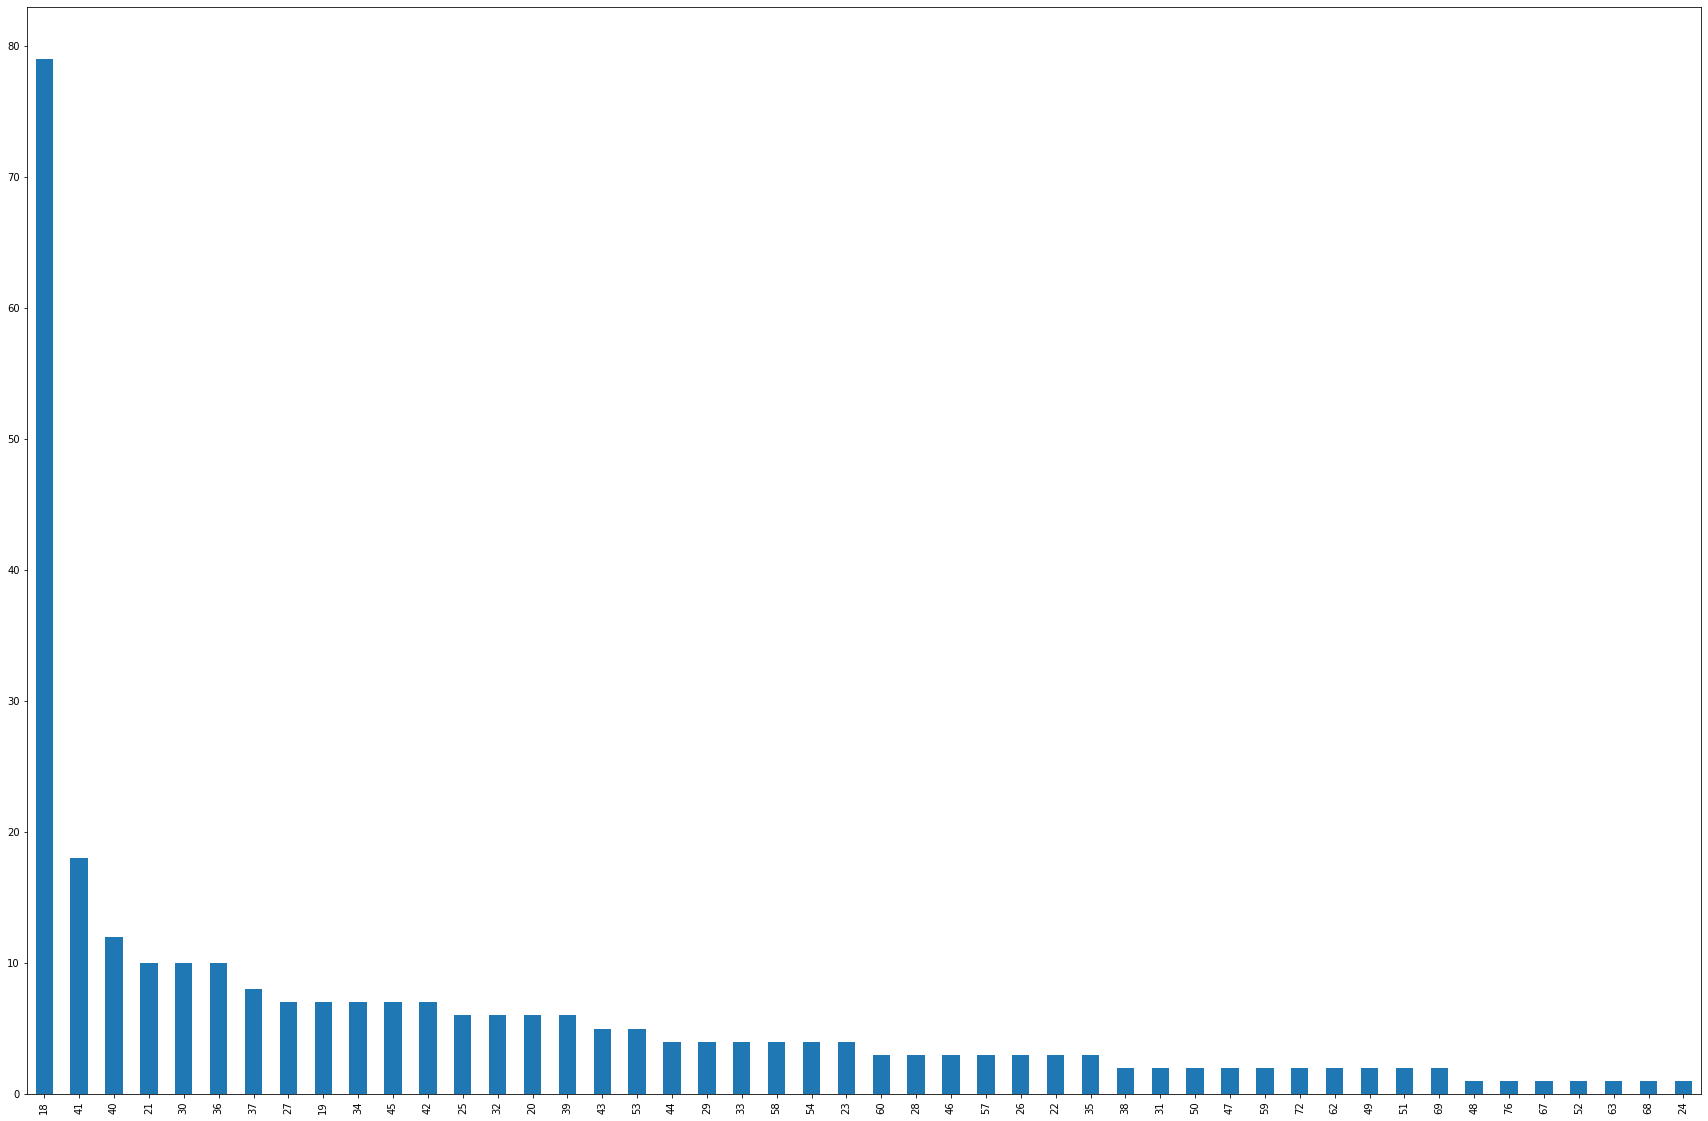

In [ ]:
plt.figure(figsize=(30,20))
output[output['customerCheckIn'] == 0]['Age'].value_counts().plot(kind = 'bar')
plt.show()

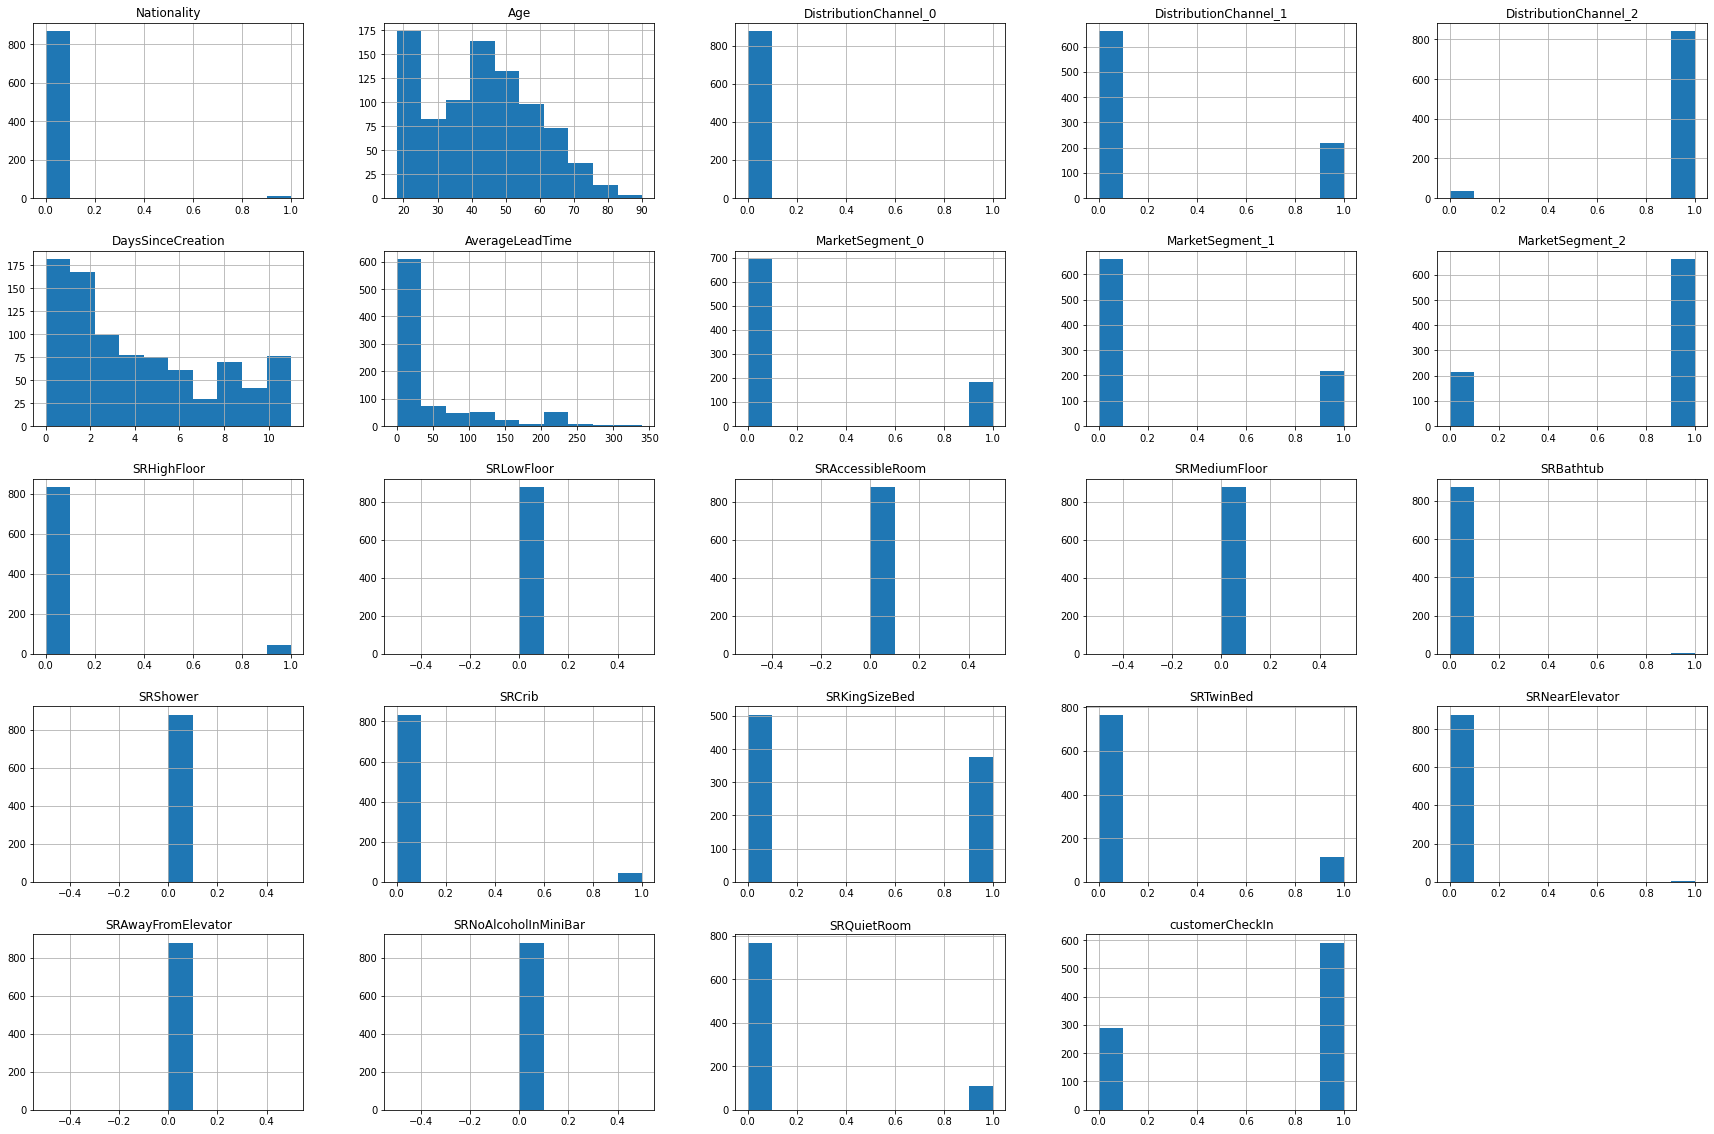

In [ ]:
output.hist(figsize=(30,20));

In [ ]:
pickle.dump(model, open('model.pkl', 'wb'))

In [ ]:
import zipfile
from zipfile import ZipFile

file_name = '/content/templates.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Extracted Successfully')

Extracted Successfully


In [ ]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 745 kB 4.2 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=1e419fd3e62d458965b96b9dc3c5c17aed80818f12cee5ad07b8595a8ef5b1fa
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


# Model Deployment using FLASK

In [ ]:
from flask import Flask, render_template, request
from pyngrok import ngrok

In [ ]:
port_no = 5000

In [ ]:
import pickle


app = Flask(__name__)
ngrok.set_auth_token("2DtEou8C3brZzaJ92vv2lw52o35_yQQpAGDZK94uKPirP8wR")
public_url =  ngrok.connect(port_no).public_url
print(public_url)

model = pickle.load(open('model.pkl', 'rb'))

@app.route('/', methods=['GET'])
def home():
  return render_template('index.html')

@app.route('/', methods=['GET', "POST"])
def predict():
  input_values = [float(x) for x in request.form.values()]
  print("INPUT VALUES = ", input_values)
  inp_features = [input_values]
  print("INPUT FEATURES = ", inp_features)
  prediction = model.predict(inp_features)
  print(prediction)
  if prediction==1:
    return render_template('index.html', prediction_text='Customer will CheckIn hotel room')
  else:
    return render_template('index.html', prediction_text='Customer won\'t checkin hotel room')

app.run(port=port_no)

http://4d13-35-201-132-28.ngrok.io
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
INFO:werkzeug:127.0.0.1 - - [27/Aug/2022 07:43:31] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [27/Aug/2022 07:43:33] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [27/Aug/2022 08:17:12] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [27/Aug/2022 08:44:41] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [27/Aug/2022 09:01:42] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [27/Aug/2022 09:01:47] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [27/Aug/2022 09:07:26] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [27/Aug/2022 09:07:30] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [27/Aug/2022 09:38:09] "GET / HTTP/1.1" 200 -


# Conclusion


*   Dataset have null values and outliers in "Age" column. Also, for the problem as per domain knowledge Age should be >= 18. Therefore Age values have been imputed with 18 for values less than 18 and knn imputer for missing values.
*   Few columns are highly correlated with other column and also with Target column("BookingsCheckedIn"). Also, few features are leaking data of target variable. Hence, based on this conditions, only few features are selected for our model. 

*   "target" column has been created using "BookingsCheckedIn" column.

*   Age 18 customers are more likely to not checkin hotel room based on their history.
*   Age 47 customers are more likely to checkin hotel room based on their history.

*   Model is trained and predicted using neural networks. Keras library is used for the same.
*   Model is deployed using flask.










